<a href="https://colab.research.google.com/github/JonyeokLEE/python_COLAB/blob/main/neuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

입력 - 뉴런 - 출력

여러 개의 뉴런이 모여 Layer를 구성.
뉴런은 입력, 가중치, 활성화함수, 출력으로 구성

뉴런에서 학습할 때 변하는 것은 가중치다.
처음에는 가중치를 초기화를 통해 random한 값을 넣고 학습 과정에서 점차 일정한 값으로 수렴.

In [220]:
# Sigmoid Function (one of Activate Function)
import math
import tensorflow as tf

def sigmoid(x):
  return 1/(1+math.exp(-x))

In [221]:
x = 1
y = 0 #기대 출력 -> error란 y와 실제출력의 차이를 뜻함.
w = tf.random.normal([1],0,1)

In [222]:
output = sigmoid(x*w)
print(output)

0.21637116110130078


**[경사하강법을 이용한 뉴런의 학습]**

결국 뉴런이란 w이며, w를 변화시켜야 한다.
이때 사용하는 방법 중 하나가 "경사하강법"이다.
경사하강법은 w에 입력과 학습률(a)과 Error를 곱한 값을 더해주는 것.
여기서는 a를 0.1로 설정.

w = w + x * *a* * error

In [223]:
for i in range(1000):
  output = sigmoid(x*w)
  error = y - output
  w = w + x * 0.1 * error

  if i % 100 == 0:
    print(i, error, output)

0 -0.21637116110130078 0.21637116110130078
100 -0.07439827024212564 0.07439827024212564
200 -0.04366373405549005 0.04366373405549005
300 -0.030717464706743913 0.030717464706743913
400 -0.02364136341591835 0.02364136341591835
500 -0.019195213722878284 0.019195213722878284
600 -0.0161475160270912 0.0161475160270912
700 -0.013930221361247625 0.013930221361247625
800 -0.012245571439039803 0.012245571439039803
900 -0.010922739329381426 0.010922739329381426


In [224]:
# x = 0, y = 1을 얻는 뉴런

x = 0
y = 1
w = tf.random.normal([1],0,1)

for i in range(1000):
  output = sigmoid(x*w)
  error = y - output
  w = w + x * 0.1 * error

  if i % 100 == 0:
    print(i, error, output)

0 0.5 0.5
100 0.5 0.5
200 0.5 0.5
300 0.5 0.5
400 0.5 0.5
500 0.5 0.5
600 0.5 0.5
700 0.5 0.5
800 0.5 0.5
900 0.5 0.5


error와 output이 0.5에서 변하지 않는 이유.

왜냐하면 w = w + x * .... 이기 때문에 x가 0이라서 w는 변화하지 않는다.

-> 이런 경우를 방지하기 위해 편향(bias)라는 것을 뉴런에 넣는다.
쉽게 말해서 뉴런이 아무것도 배우지 못하는 상황을 방지한다.

편향의 입력으로는 보편적으로는 1을 넣는다.

In [225]:
x = 0
y = 1
w = tf.random.normal([1],0,1)
b = tf.random.normal([1],0,1)

for i in range(1000):
  output = sigmoid(x*w + 1*b)
  error = y - output
  w = w + x * 0.1 * error
  b = b + 1 * 0.1 * error

  if i % 100 == 0:
    print(i, error, output)

0 0.8232537897841741 0.17674621021582598
100 0.12745219023325816 0.8725478097667418
200 0.058706399220437966 0.941293600779562
300 0.0376098867853204 0.9623901132146796
400 0.02756104754031452 0.9724389524596855
500 0.021715240221223397 0.9782847597787766
600 0.017900856347675353 0.9820991436523246
700 0.015219235328850722 0.9847807646711493
800 0.013232518762411383 0.9867674812375886
900 0.011702347933979507 0.9882976520660205


In [226]:
# AND 신경망 네트워크
import numpy as np
x = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[0],[0],[1]])

w = tf.random.normal([2],0,1)
b = tf.random.normal([1],0,1)
b_x = 1

In [227]:
for i in range(2000):
  error_sum = 0
  for j in range(4):
    output = sigmoid(np.sum(x[j]*w)+b_x*b)
    error = y[j][0] - output
    w = w + x[j] * 0.1 * error
    b = b + b_x * 0.1 * error
    error_sum += error
  if i % 100 == 0:
    print(i, error_sum)

0 -1.4069152441989838
100 -0.16015463102069805
200 -0.1062138311587788
300 -0.08002310075168395
400 -0.06420839897434988
500 -0.05356276778103136
600 -0.04590109602135545
700 -0.04012503764734954
800 -0.035617852093915214
900 -0.03200581364986729
1000 -0.02904766568884512
1100 -0.026581094606020567
1200 -0.024495766064753233
1300 -0.022709299697569352
1400 -0.021162329404681296
1500 -0.01980949100954635
1600 -0.01861712830706265
1700 -0.017559166890009262
1800 -0.016613201705069566
1900 -0.01576364429668929


In [228]:
for i in range(4):
  print('X: ', x[i], 'Y: ', y[i], 'Output: ', sigmoid(np.sum(x[i]*w)+b_x*b))

X:  [0 0] Y:  [0] Output:  2.35773835737325e-05
X:  [0 1] Y:  [0] Output:  0.024959347807374233
X:  [1 0] Y:  [0] Output:  0.025035202399602753
X:  [1 1] Y:  [1] Output:  0.9653719808073418


In [229]:
# OR 신경망 네트워크
x = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[1]])

w = tf.random.normal([2],0,1)
b = tf.random.normal([1],0,1)
b_x = 1

In [230]:
for i in range(2000):
  error_sum = 0
  for j in range(4):
    output = sigmoid(np.sum(x[j]*w)+b_x*b)
    error = y[j][0] - output
    w = w + x[j] * 0.1 * error
    b = b + b_x * 0.1 * error
    error_sum += error
  if i % 100 == 0:
    print(i, error_sum)

0 1.848011797151289
100 -0.11394135372273195
200 -0.055919853946056225
300 -0.036977454328210146
400 -0.02755780573286093
500 -0.021913479459144708
600 -0.018159006436429134
700 -0.015485733366943838
800 -0.013488330219255357
900 -0.011940652425186389
1000 -0.010707203902487888
1100 -0.00970179740334158
1200 -0.008866961272174213
1300 -0.008163202545770694
1400 -0.007561457338155941
1500 -0.007041753536313852
1600 -0.00658791329487228
1700 -0.006188526318802602
1800 -0.00583490252366467
1900 -0.00551861800613241


In [231]:
for i in range(4):
  print('X: ', x[i], 'Y: ', y[i], 'Output: ', sigmoid(np.sum(x[i]*w)+b_x*b))

X:  [0 0] Y:  [0] Output:  0.02596085370962601
X:  [0 1] Y:  [1] Output:  0.9896782986387337
X:  [1 0] Y:  [1] Output:  0.9896405388938139
X:  [1 1] Y:  [1] Output:  0.9999970902301585


In [232]:
print('w: ',w)
print('b: ',b)

w:  tf.Tensor([8.184303 8.187993], shape=(2,), dtype=float32)
b:  tf.Tensor([-3.6248617], shape=(1,), dtype=float32)


In [233]:
# XOR 신경망 네트워크
x = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

w = tf.random.normal([2],0,1)
b = tf.random.normal([1],0,1)
b_x = 1

In [234]:
for i in range(2000):
  error_sum = 0
  for j in range(4):
    output = sigmoid(np.sum(x[j]*w)+b_x*b)
    error = y[j][0] - output
    w = w + x[j] * 0.1 * error
    b = b + b_x * 0.1 * error
    error_sum += error
  if i % 100 == 0:
    print(i, error_sum)

0 0.3629199711434564
100 0.020667279578289177
200 0.00417050865016011
300 0.000840788366914591
400 0.00016950891054301476
500 3.418706804114713e-05
600 6.89564287725819e-06
700 1.396996865854483e-06
800 2.9224312347864156e-07
900 2.0475632522831688e-08
1000 4.746623760709667e-08
1100 4.746623760709667e-08
1200 4.746623760709667e-08
1300 4.746623760709667e-08
1400 4.746623760709667e-08
1500 4.746623760709667e-08
1600 4.746623760709667e-08
1700 4.746623760709667e-08
1800 4.746623760709667e-08
1900 4.746623760709667e-08


In [235]:
for i in range(4):
  print('X: ', x[i], 'Y: ', y[i], 'Output: ', sigmoid(np.sum(x[i]*w)+b_x*b))

X:  [0 0] Y:  [0] Output:  0.5128175691057347
X:  [0 1] Y:  [1] Output:  0.49999997485429043
X:  [1 0] Y:  [1] Output:  0.4871823676059484
X:  [1 1] Y:  [0] Output:  0.47438160794816525


XOR의 경우, Error값은 점점 줄어들다가 변화하지 않으며,
Output도 기댓값과 상당한 차이를 보이는 것을 확인할 수 있다.

그 이유를 찾기 위해 w와 b를 출력해본다.

In [236]:
print('w: ',w)
print('b: ',b)

w:  tf.Tensor([-0.10256328 -0.05128161], shape=(2,), dtype=float32)
b:  tf.Tensor([0.05128151], shape=(1,), dtype=float32)


중간 계산값이 0에 가까워지기 때문에, 최종 출력이 0.5에 가까워진다.

AND나 OR는 편향과 가중치의 차이가 명확하고, 그로 인해 무엇을 하려는지 명확하다.
하지만 XOR는 편향과 가중치의 차이가 적고, 무엇을 하려는지 명확하지가 않다.
이러한 문제의 해결책으로는 여러 개의 뉴런(퍼셉트론)을 사용하는 것이 있다.

In [237]:
# XOR 신경망 네트워크 using tf.keras
x = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=2, activation='sigmoid', input_shape=(2,)), # units = 레이어를 구성하는 뉴런의 수
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])
# layers.Dense는 여러 개의 뉴런을 레이어 단위로 일직선으로 배치한 것.

# input_shape = 입력의 차원의 수 / [1,1], [0,1]과 같이 2개의 입력을 받는 1차원 Array이므로, (2,)라고 명시

In [238]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.6), loss='mse')
# SGD(Stochastic Gradient Descent): 경사하강법
# mse(Mean Squared Error): 평균 제곱 오차, loss인 mse를 줄이는 방향으로 학습한다.
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 2)                 6         
                                                                 
 dense_21 (Dense)            (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [239]:
# 2-Layer XOR Network 학습 by using tf.keras

# 즉, 모델 학습 시작

history = model.fit(x, y, epochs = 1000, batch_size = 1) # 이 변수는 향후 그래프 그리는 곳에서도 사용됨.
# epochs : 훈련 데이터를 반복 학습 시키는 횟수
# batch_size :  각 epoch에 학습시키는 훈련 데이터의 수

Epoch 1/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.3088
Epoch 2/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2948
Epoch 3/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2853
Epoch 4/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2819
Epoch 5/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2759
Epoch 6/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2763
Epoch 7/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2762
Epoch 8/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2725
Epoch 9/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2752
Epoch 10/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2751
Epoch 11/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2740
Epoch 12/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2719
Epoch 13/1000
4/4 [==============================

In [240]:
# 모델 평가
model.predict(x)

1/1 [==============================] - 0s 115ms/step


array([[0.03820131],
       [0.95307034],
       [0.9540347 ],
       [0.04647132]], dtype=float32)

In [241]:
for weight in model.weights:
  print(weight) #각 가중치와 편향 확인

<tf.Variable 'dense_20/kernel:0' shape=(2, 2) dtype=float32, numpy=
array([[-6.27366  ,  4.033854 ],
       [-5.8870215,  3.9783854]], dtype=float32)>
<tf.Variable 'dense_20/bias:0' shape=(2,) dtype=float32, numpy=array([ 2.2119985, -6.2118583], dtype=float32)>
<tf.Variable 'dense_21/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[-7.9996347],
       [-8.181865 ]], dtype=float32)>
<tf.Variable 'dense_21/bias:0' shape=(1,) dtype=float32, numpy=array([4.000686], dtype=float32)>


가중치 정보는 model.weights에 저장되어 있고,
입력과 레이어, 레이어 사이의 뉴런을 연결할 때 사용되는 가중치는 kernel,
편향과 연결된 가중치는 bias

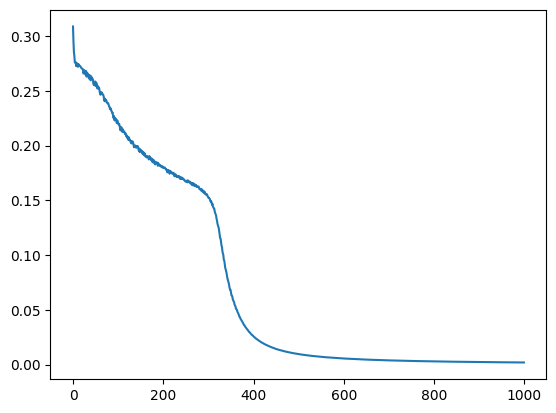

In [242]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
# 손실에 대한 그래프 -> 쭉 감소